In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline

In [2]:
import datetime 

interventions_df = pd.read_csv('donneesouvertes-interventions-sim.csv')
interventions_df['CREATION_DATE_TIME'] = interventions_df['CREATION_DATE_TIME'].astype('datetime64[ns]')
interventions_df = interventions_df[(interventions_df['CREATION_DATE_TIME']>=pd.Timestamp(2016,1,1)) & (interventions_df['CREATION_DATE_TIME']<=pd.Timestamp(2016,12,31))]  
interventions_df = interventions_df[interventions_df['INCIDENT_TYPE_DESC'] != 'Premier répondant']
interventions_df.head()

,INCIDENT_NBR,CREATION_DATE_TIME,INCIDENT_TYPE_DESC,DESCRIPTION_GROUPE,CASERNE,NOM_VILLE,NOM_ARROND,DIVISION,NOMBRE_UNITES,CIV,MTM8_X,MTM8_Y,LONGITUDE,LATITUDE
6275,14815,2016-02-13 23:38:39,Alarme privé ou locale,Alarmes-incendies,75,Montréal,Outremont,4,2.0,1.0,296337.8,5042297.4,-73.608320,45.520543
6278,14821,2016-02-14 00:00:04,Avertisseur de CO,SANS FEU,4,Montréal,Côte-des-Neiges / Notre-Dame-de-Grâce,4,3.0,1.0,294405.8,5039472.7,-73.632991,45.495100
6279,14822,2016-02-14 00:01:07,Problèmes électriques,SANS FEU,57,Montréal,Pierrefonds / Roxboro,1,2.0,1.0,279948.8,5041172.1,-73.818049,45.510026
6280,14823,2016-02-14 00:06:58,Alarme privé ou locale,Alarmes-incendies,46,Montréal,Côte-des-Neiges / Notre-Dame-de-Grâce,4,3.0,1.0,294317.6,5036959.5,-73.634066,45.472484
6282,14826,2016-02-14 00:11:05,Feu de véhicule extérieur,AUTREFEU,19,Montréal,Ville-Marie,6,6.0,1.0,300626.1,5043469.1,-73.553438,45.531126


In [3]:
interventions_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42982 entries, 6275 to 538761
Data columns (total 14 columns):
INCIDENT_NBR          42982 non-null int64
CREATION_DATE_TIME    42982 non-null datetime64[ns]
INCIDENT_TYPE_DESC    42982 non-null object
DESCRIPTION_GROUPE    42982 non-null object
CASERNE               42982 non-null int64
NOM_VILLE             42982 non-null object
NOM_ARROND            42982 non-null object
DIVISION              42982 non-null int64
NOMBRE_UNITES         42982 non-null float64
CIV                   35168 non-null float64
MTM8_X                42982 non-null float64
MTM8_Y                42982 non-null float64
LONGITUDE             42982 non-null float64
LATITUDE              42982 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(3), object(4)
memory usage: 4.9+ MB


In [4]:
interventions_df['NOM_ARROND'] = np.where(interventions_df['NOM_ARROND'] == 'Indéterminé', interventions_df['NOM_VILLE'], interventions_df['NOM_ARROND']) 
interventions_df.head()

,INCIDENT_NBR,CREATION_DATE_TIME,INCIDENT_TYPE_DESC,DESCRIPTION_GROUPE,CASERNE,NOM_VILLE,NOM_ARROND,DIVISION,NOMBRE_UNITES,CIV,MTM8_X,MTM8_Y,LONGITUDE,LATITUDE
6275,14815,2016-02-13 23:38:39,Alarme privé ou locale,Alarmes-incendies,75,Montréal,Outremont,4,2.0,1.0,296337.8,5042297.4,-73.608320,45.520543
6278,14821,2016-02-14 00:00:04,Avertisseur de CO,SANS FEU,4,Montréal,Côte-des-Neiges / Notre-Dame-de-Grâce,4,3.0,1.0,294405.8,5039472.7,-73.632991,45.495100
6279,14822,2016-02-14 00:01:07,Problèmes électriques,SANS FEU,57,Montréal,Pierrefonds / Roxboro,1,2.0,1.0,279948.8,5041172.1,-73.818049,45.510026
6280,14823,2016-02-14 00:06:58,Alarme privé ou locale,Alarmes-incendies,46,Montréal,Côte-des-Neiges / Notre-Dame-de-Grâce,4,3.0,1.0,294317.6,5036959.5,-73.634066,45.472484
6282,14826,2016-02-14 00:11:05,Feu de véhicule extérieur,AUTREFEU,19,Montréal,Ville-Marie,6,6.0,1.0,300626.1,5043469.1,-73.553438,45.531126


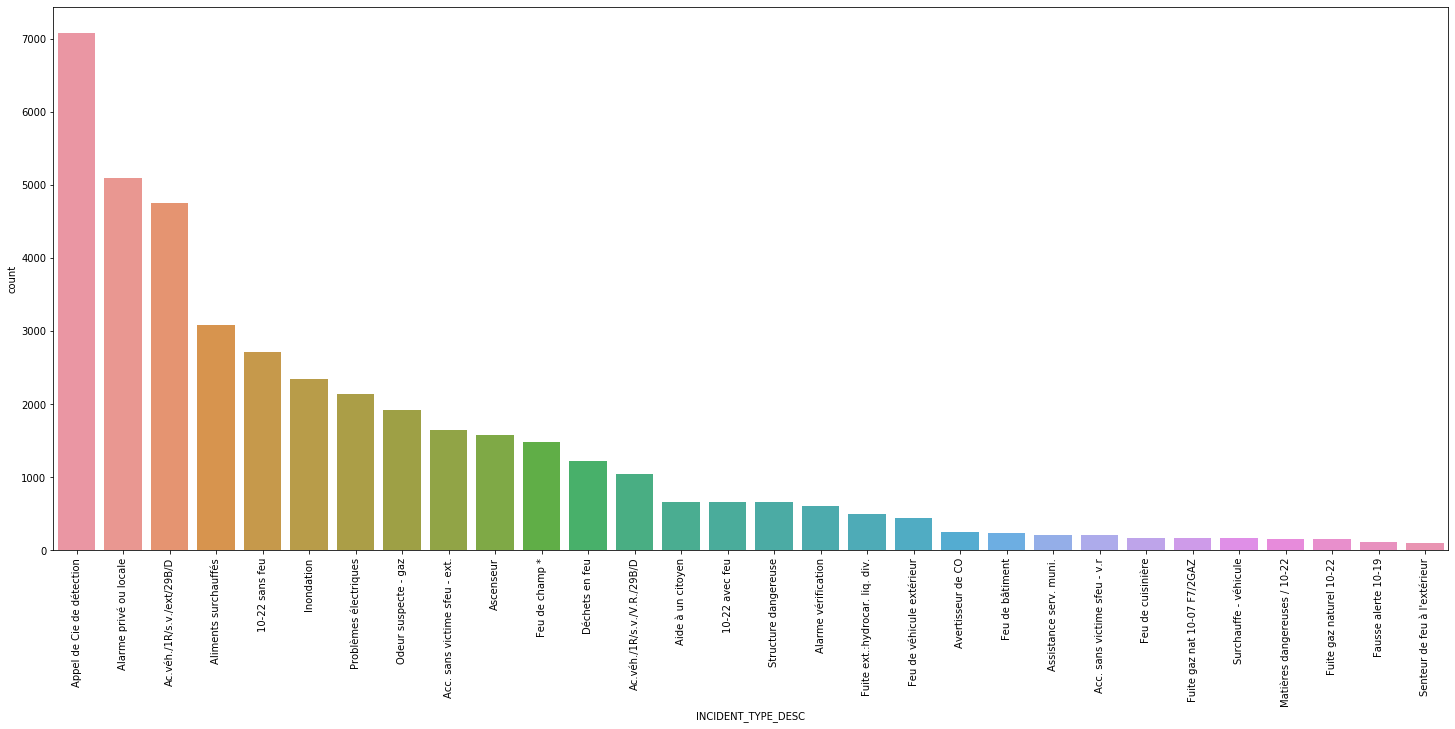

In [21]:
incident_type_df = interventions_df.groupby('INCIDENT_TYPE_DESC').filter(lambda x: len(x) > 100)
incidents = incident_type_df['INCIDENT_TYPE_DESC'].value_counts().index.tolist()
fig, ax = plt.subplots(figsize = (25, 10))
sns.countplot(x = incident_type_df['INCIDENT_TYPE_DESC'], order = incidents, ax = ax)
plt.xticks(rotation = 90)
plt.show()

In [22]:
unique_incident_types = incident_type_df['INCIDENT_TYPE_DESC'].unique()
unique_incident_types

array(['Alarme privé ou locale', 'Avertisseur de CO',
       'Problèmes électriques', 'Feu de véhicule extérieur',
       '10-22 sans feu', 'Appel de Cie de détection',
       'Acc. sans victime sfeu - ext.', 'Feu de bâtiment',
       'Aliments surchauffés', "Senteur de feu à l'extérieur",
       'Ac.véh./1R/s.v./ext/29B/D', 'Assistance serv. muni.',
       'Feu de champ *', 'Inondation', 'Ascenseur',
       'Odeur suspecte - gaz', 'Aide à un citoyen', '10-22 avec feu',
       'Alarme vérification', 'Fausse alerte 10-19',
       'Fuite ext.:hydrocar. liq. div.', 'Structure dangereuse',
       'Feu de cuisinière', 'Déchets en feu',
       'Matières dangereuses / 10-22', 'Fuite gaz naturel 10-22',
       'Surchauffe - véhicule', 'Fuite gaz nat 10-07 F7/2GAZ',
       'Acc. sans victime sfeu - v.r', 'Ac.véh./1R/s.v./V.R./29B/D'],
      dtype=object)

In [23]:
incident_type_pivot = interventions_df[interventions_df["INCIDENT_TYPE_DESC"].isin(unique_incident_types)].pivot_table(values='INCIDENT_NBR', index='NOM_ARROND', columns='INCIDENT_TYPE_DESC', aggfunc=pd.Series.nunique, fill_value = 0)
incident_type_pivot.shape

(33, 30)

In [24]:
incident_type_pivot.head(10)

INCIDENT_TYPE_DESC,10-22 avec feu,10-22 sans feu,Ac.véh./1R/s.v./V.R./29B/D,Ac.véh./1R/s.v./ext/29B/D,Acc. sans victime sfeu - ext.,Acc. sans victime sfeu - v.r,Aide à un citoyen,Alarme privé ou locale,Alarme vérification,Aliments surchauffés,...,Fuite ext.:hydrocar. liq. div.,Fuite gaz nat 10-07 F7/2GAZ,Fuite gaz naturel 10-22,Inondation,Matières dangereuses / 10-22,Odeur suspecte - gaz,Problèmes électriques,Senteur de feu à l'extérieur,Structure dangereuse,Surchauffe - véhicule
NOM_ARROND,,,,,,,,,,,,,,,,,,,,,
Ahuntsic / Cartierville,43,165,102,425,145,21,38,362,39,240,...,19,2,2,132,6,82,134,5,35,14
Anjou,7,44,72,113,40,15,13,62,10,68,...,12,2,2,26,5,30,36,2,4,6
Baie d'Urfé,1,6,7,7,2,0,0,1,2,12,...,1,0,0,6,1,2,15,0,0,0
Beaconsfield,0,17,13,12,6,4,5,4,4,26,...,0,3,0,17,0,12,30,2,4,2
Côte St-Luc,6,36,0,0,21,0,8,64,7,54,...,2,1,1,31,2,22,20,0,3,3
Côte-des-Neiges / Notre-Dame-de-Grâce,60,244,111,293,121,24,63,788,35,354,...,32,16,9,240,20,175,206,5,53,15
Dollard-des-Ormeaux,16,47,0,94,20,0,7,50,17,64,...,5,4,0,28,3,34,50,2,5,0
Dorval,6,24,52,63,17,9,11,41,8,34,...,4,1,6,21,4,26,39,0,1,4
Hampstead,0,31,0,9,3,0,3,3,1,11,...,0,2,0,5,1,8,6,0,1,1


In [25]:
incident_type_df = pd.DataFrame(incident_type_pivot.to_records())
incident_type_df.head()
clust_data = incident_type_df.drop("NOM_ARROND",axis=1)

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

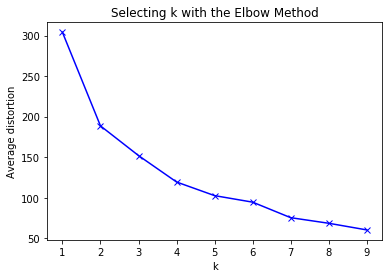

In [26]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]
 
for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(clust_data)
    prediction=model.predict(clust_data)
    meanDistortions.append(sum(np.min(cdist(clust_data, model.cluster_centers_, 'euclidean'), axis=1)) / clust_data.shape[0])
 
#plt.cla()
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [27]:
final_model=KMeans(8)
final_model.fit(clust_data)
prediction=final_model.predict(clust_data)
 
#Join predicted clusters back to raw data
incident_type_df["GROUP"] = prediction
print("Groups Assigned : \n")
incident_type_df[["GROUP","NOM_ARROND"]].sort_values('GROUP')

Groups Assigned : 



,GROUP,NOM_ARROND
8,0,Hampstead
15,0,Montréal-Est
26,0,Senneville
10,0,L'Ile-Bizard / Ste-Geneviève
9,0,Kirkland
27,0,Ste-Anne-de-Bellevue
17,0,Montréal-Ouest
4,0,Côte St-Luc
3,0,Beaconsfield
2,0,Baie d'Urfé


/Users/jackhawa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/Users/jackhawa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/Users/jackhawa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control th

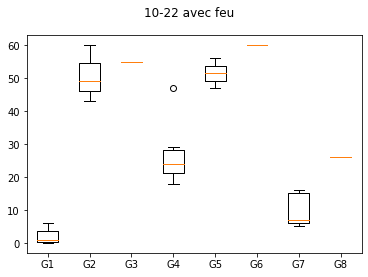

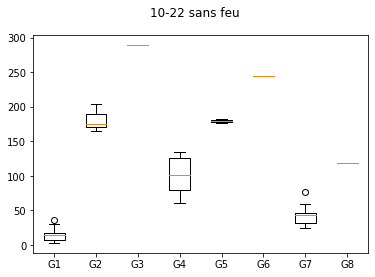

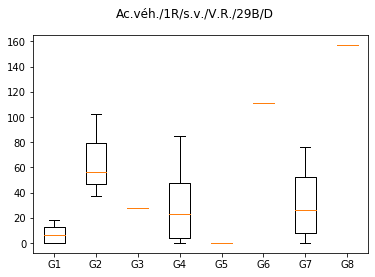

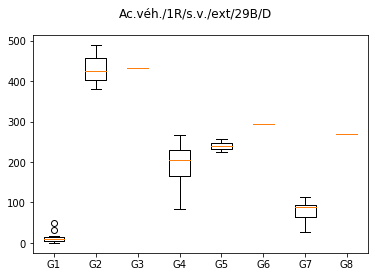

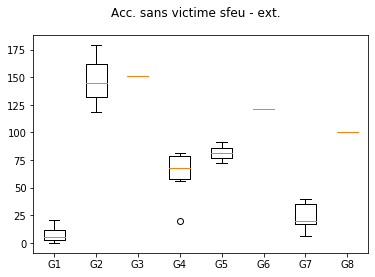

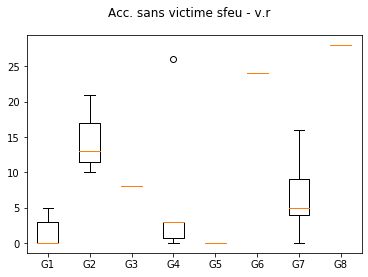

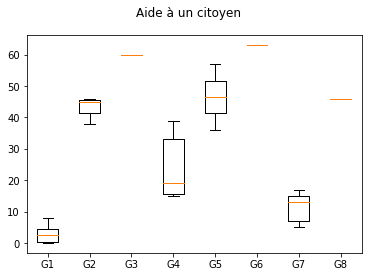

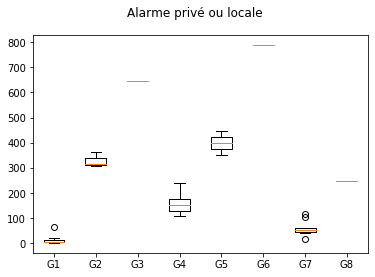

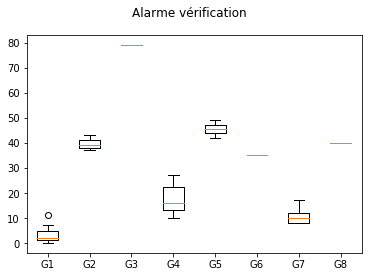

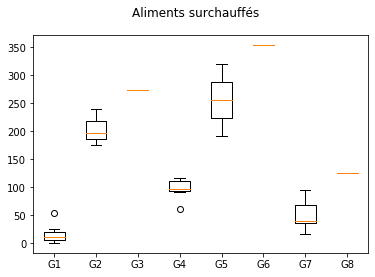

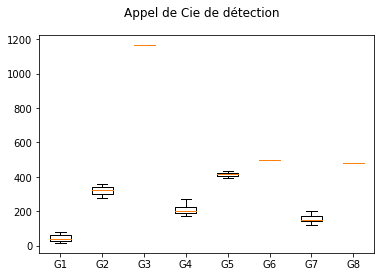

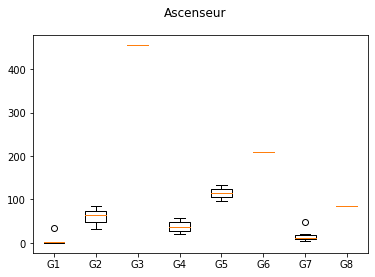

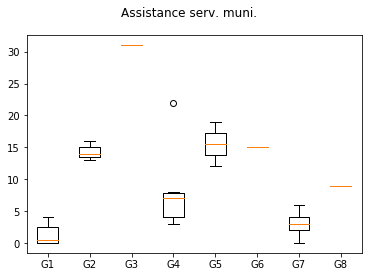

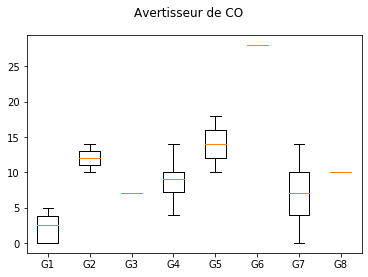

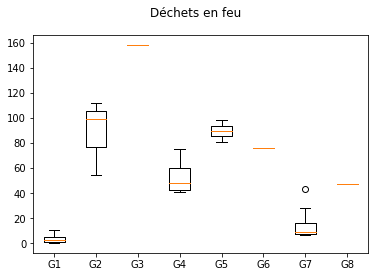

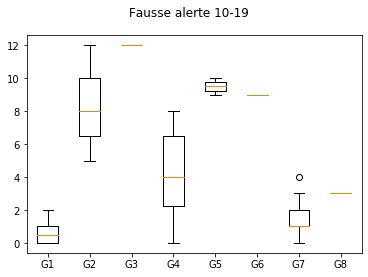

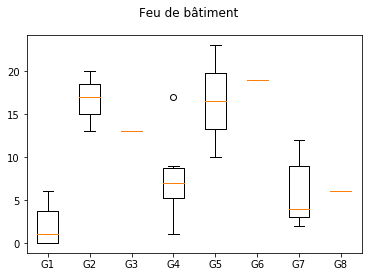

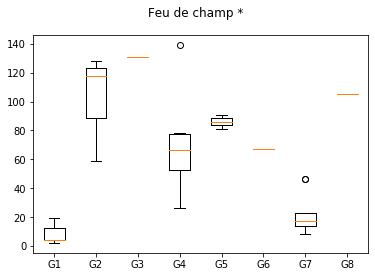

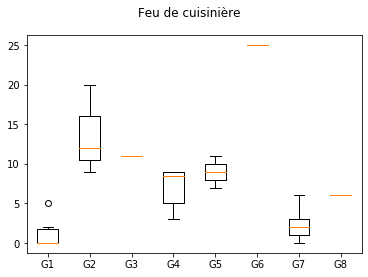

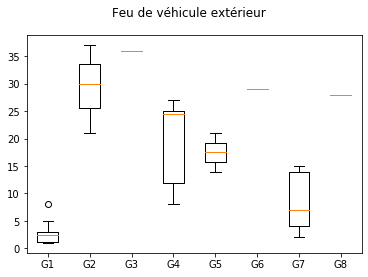

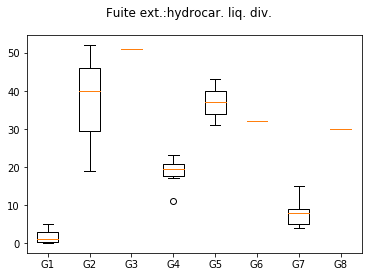

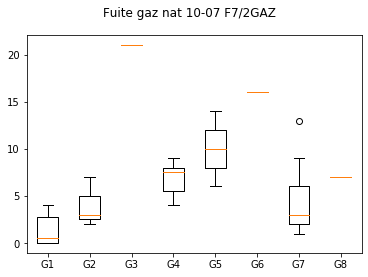

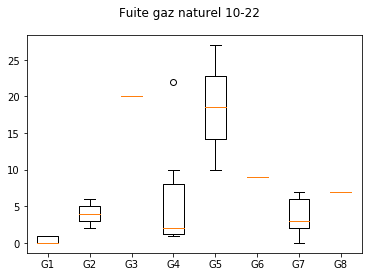

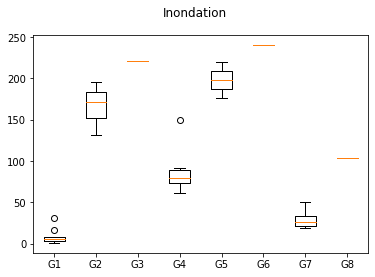

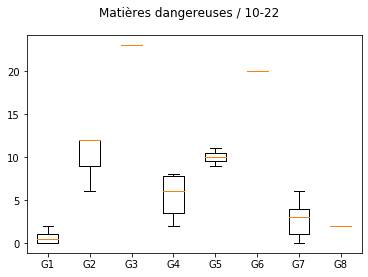

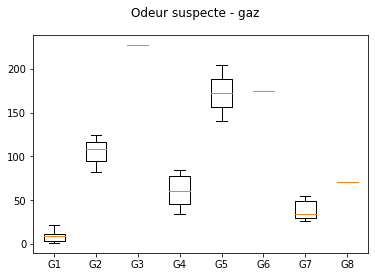

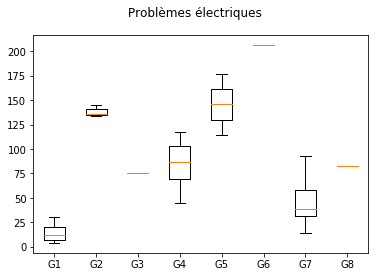

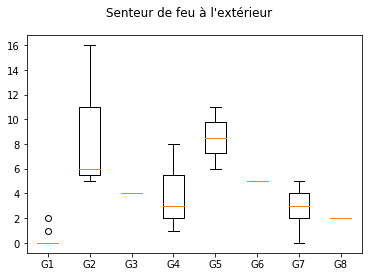

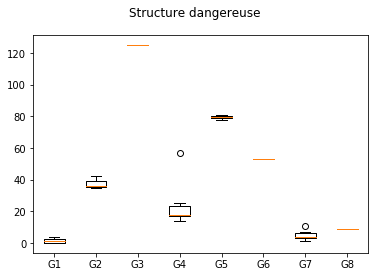

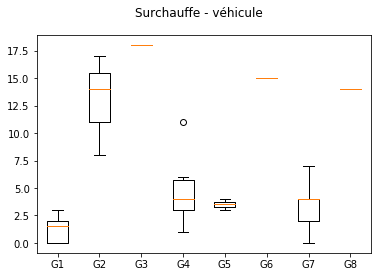

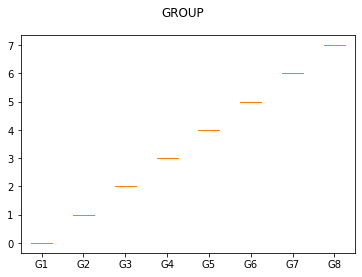

In [28]:
gen = (x for x in incident_type_df if x not in "NOM_ARROND")

for column in gen:
    boxplot_field = column
    plt.figure()
    plt.suptitle(boxplot_field)
    plt.boxplot([incident_type_df[boxplot_field][incident_type_df.GROUP==0],
            incident_type_df[boxplot_field][incident_type_df.GROUP==1],
            incident_type_df[boxplot_field][incident_type_df.GROUP==2],
            incident_type_df[boxplot_field][incident_type_df.GROUP==3],
            incident_type_df[boxplot_field][incident_type_df.GROUP==4],
            incident_type_df[boxplot_field][incident_type_df.GROUP==5],
            incident_type_df[boxplot_field][incident_type_df.GROUP==6],
            incident_type_df[boxplot_field][incident_type_df.GROUP==7]],
            labels=('G1','G2','G3','G4','G5','G6','G7','G8'));

In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

labelencoder = LabelEncoder()
arrond_df = pd.DataFrame(labelencoder.fit_transform(interventions_df['NOM_ARROND']))


onehotencoder = OneHotEncoder()
arrond_df = pd.DataFrame(onehotencoder.fit_transform(arrond_df).toarray())


/Users/jackhawa/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [14]:
arrond_df.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [15]:
kmeans = KMeans(n_clusters = 20, n_init = 5, n_jobs = -1)
kmeans.fit(arrond_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=20, n_init=5, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [16]:
interventions_df['cluster'] = kmeans.labels_

In [17]:
type(unique_incident_types)

numpy.ndarray

In [18]:
interventions_df = interventions_df[interventions_df['INCIDENT_TYPE_DESC'].isin(unique_incident_types)]

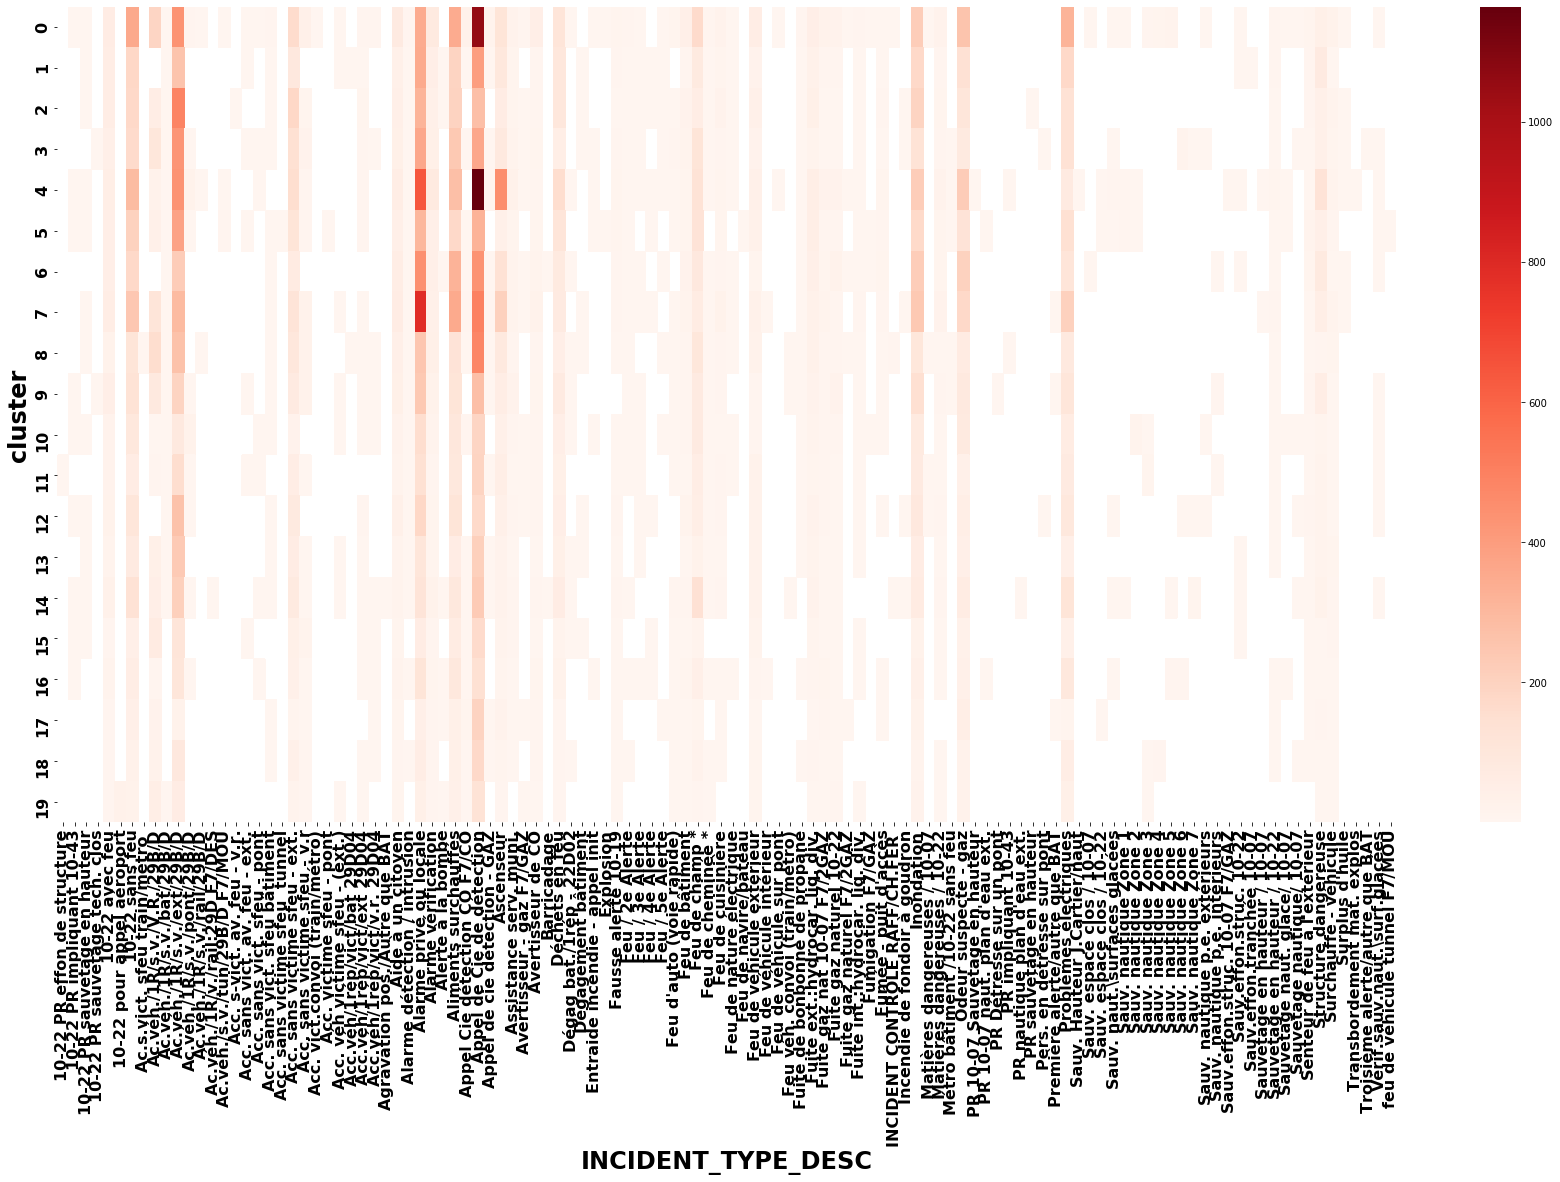

In [19]:

clusters = interventions_df.groupby(['cluster', 'INCIDENT_TYPE_DESC']).size()
fig2, ax2 = plt.subplots(figsize = (30, 15))
sns.heatmap(clusters.unstack(level = 'INCIDENT_TYPE_DESC'), ax = ax2, cmap = 'Reds')

ax2.set_xlabel('INCIDENT_TYPE_DESC', fontdict = {'weight': 'bold', 'size': 24})
ax2.set_ylabel('cluster', fontdict = {'weight': 'bold', 'size': 24})
for label in ax2.get_xticklabels():
    label.set_size(16)
    label.set_weight("bold")
for label in ax2.get_yticklabels():
    label.set_size(16)
    label.set_weight("bold")

In [20]:
interventions_df.head(40)

,INCIDENT_NBR,CREATION_DATE_TIME,INCIDENT_TYPE_DESC,DESCRIPTION_GROUPE,CASERNE,NOM_VILLE,NOM_ARROND,DIVISION,NOMBRE_UNITES,CIV,MTM8_X,MTM8_Y,LONGITUDE,LATITUDE,cluster
6275,14815,2016-02-13 23:38:39,Alarme privé ou locale,Alarmes-incendies,75,Montréal,Outremont,4,2.0,1.0,296337.8,5042297.4,-73.608320,45.520543,0
6278,14821,2016-02-14 00:00:04,Avertisseur de CO,SANS FEU,4,Montréal,Côte-des-Neiges / Notre-Dame-de-Grâce,4,3.0,1.0,294405.8,5039472.7,-73.632991,45.495100,7
6279,14822,2016-02-14 00:01:07,Problèmes électriques,SANS FEU,57,Montréal,Pierrefonds / Roxboro,1,2.0,1.0,279948.8,5041172.1,-73.818049,45.510026,16
6280,14823,2016-02-14 00:06:58,Alarme privé ou locale,Alarmes-incendies,46,Montréal,Côte-des-Neiges / Notre-Dame-de-Grâce,4,3.0,1.0,294317.6,5036959.5,-73.634066,45.472484,7
6282,14826,2016-02-14 00:11:05,Feu de véhicule extérieur,AUTREFEU,19,Montréal,Ville-Marie,6,6.0,1.0,300626.1,5043469.1,-73.553438,45.531126,4
6283,14827,2016-02-14 00:12:48,10-22 sans feu,SANS FEU,28,Montréal,Anjou,9,6.0,1.0,299947.0,5050604.9,-73.562204,45.595332,15
6285,14834,2016-02-14 00:28:06,Appel de Cie de détection,Alarmes-incendies,27,Montréal,Côte-des-Neiges / Notre-Dame-de-Grâce,4,4.0,1.0,295157.4,5039662.5,-73.623379,45.496819,7
6286,14835,2016-02-14 00:32:27,Alarme privé ou locale,Alarmes-incendies,35,Montréal,Ahuntsic / Cartierville,3,3.0,1.0,291348.9,5045543.0,-73.672270,45.549671,3
6298,8029,2016-01-24 17:28:56,10-22 sans feu,SANS FEU,40,Montréal,Mercier / Hochelaga-Maisonneuve,7,10.0,1.0,303708.7,5052084.5,-73.513991,45.608662,5
6299,8031,2016-01-24 17:32:42,Alarme privé ou locale,Alarmes-incendies,67,Montréal,Verdun,5,4.0,1.0,301135.7,5034846.3,-73.546849,45.453537,10
